# Credit Card Fraud Detection Using ML
#### Author : Mayank Yadav

## Sections
1. <a href='#data_preprocessing'>Data Preprocessing</a>
    1. <a href='#import_library'>Importing Libaries</a>
    2. <a href='#import_dataset'>Importing Dataset</a>
    3. <a href='#check_missing'>Check For Missing Values</a>
2. <a href='#data_visual'>Data Visualisation</a>
3. <a href='#data_balance'>Creating Balanced Dataset</a>
4. <a href='#data_split'>Split Dataset Into Train And Test</a>
5. <a href='#feature_scale'>Feature Scaling</a>
6. <a href='#model_build'>Model Building</a>
    1. <a href='#knn'>KNN Classifier</a>
    2. <a href='#decision_tree'>Decision Tree Classifier</a>
    3. <a href='#random_forest'>Random Forest Classifier</a>
    4. <a href='#svm'>SVM Classifier</a>
    5. <a href='#naive_bayes'>Naive Bayes Classifier</a>
    6. <a href='#lr'>Logistic Regression</a>
7. <a href='#model_eval'>Model Evaluation</a>
    1. <a href='#knn_eval'>KNN Classifier Evaluation</a>
    2. <a href='#decision_tree_eval'>Decision Tree Classifier Evaluation</a>
    3. <a href='#random_forest_eval'>Random Forest Classifier Evaluation</a>
    4. <a href='#svm_eval'>SVM Classifier Evaluation</a>
    5. <a href='#naive_bayes_eval'>Naive Bayes Classifier Evaluation</a>
    6. <a href='#lr_eval'>Logistic Regression Evaluation</a>
8. <a href='#model_compare'>Model Performance Comparison</a>
9. <a href='#best_model'>Best Model Predictions (Confusion Matrix, Classification Report)</a>

<a id='data_preprocessing'></a>

## Data Preprocessing

<a id='import_library'></a>

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='import_dataset'></a>

### Importing Dataset

In [2]:
dataset = pd.read_csv('creditcard.csv')

In [3]:
# Displaying Dataset Head
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<a id='check_missing'></a>

### Checking For Missing Values In Dataset

In [4]:
# Checking For Missing Values In Dataset
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No Missing Data (NA) In The Dataset

<a id='data_visual'></a>

## Data Visualisation

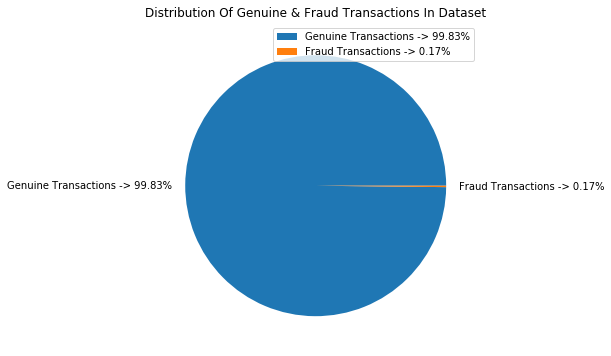

In [5]:
plt.figure(figsize = (6,6))
dataset['Class'].value_counts()
counts = [dataset['Class'].value_counts().iloc[0],dataset['Class'].value_counts().iloc[1]]
labels = ['Genuine Transactions -> ' + str(round((counts[0]/dataset.shape[0]) * 100, 2)) + "%", 'Fraud Transactions -> '  + str(round((counts[1]/dataset.shape[0]) * 100, 2)) + "%"]
plt.pie(counts, labels=labels)
plt.legend()
plt.title('Distribution Of Genuine & Fraud Transactions In Dataset')
plt.show()

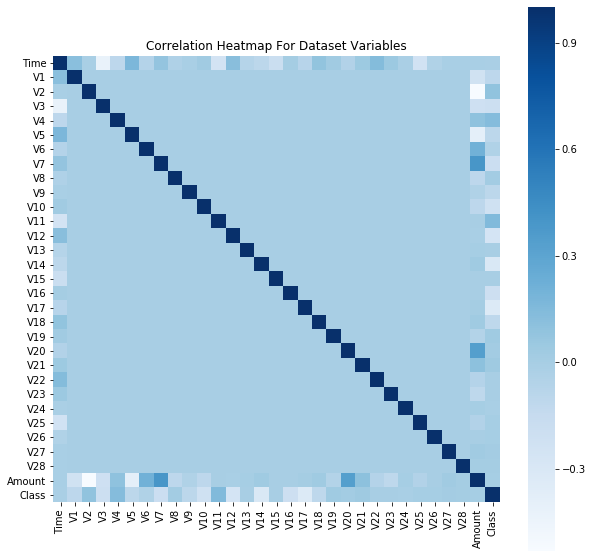

In [6]:
# Plotting Correlation Between Different Factors Of Dataset
data_corr = dataset.corr()
fig = plt.figure(figsize = (10,10))
sns.heatmap(data_corr, square=True, cmap='Blues')
plt.title('Correlation Heatmap For Dataset Variables')
plt.show()

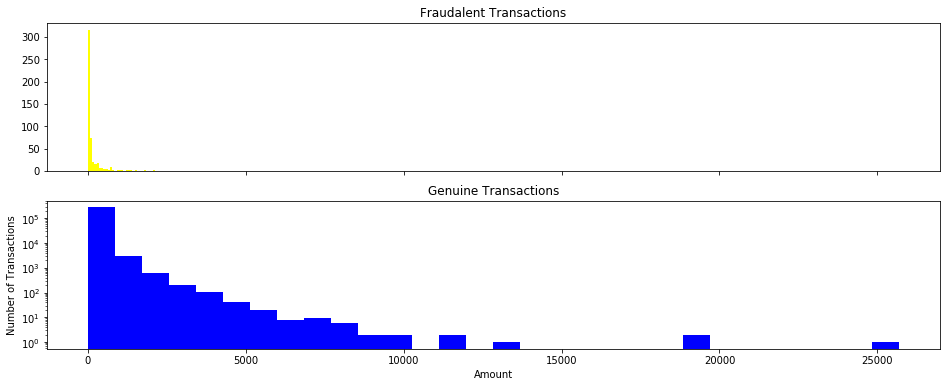

In [7]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,6))
ax1.hist(dataset.Amount[dataset.Class == 1], bins = 30, color='yellow')
ax1.set_title('Fraudalent Transactions')
plt.xlabel('Amount')
ax2.hist(dataset.Amount[dataset.Class == 0], bins = 30, color='blue')
ax2.set_title('Genuine Transactions')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

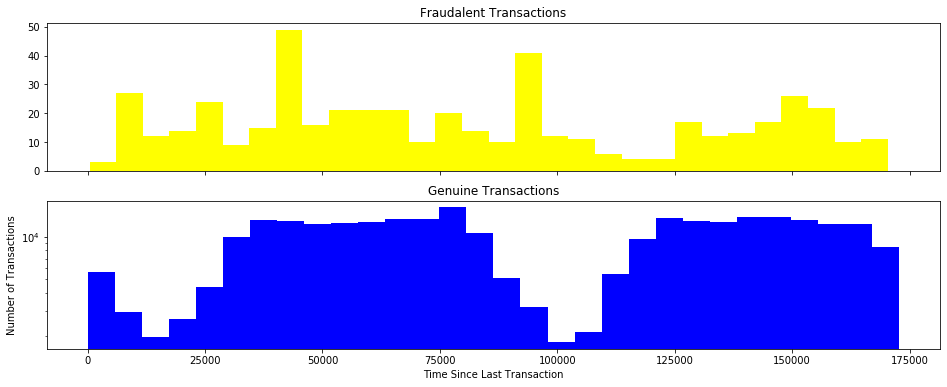

In [8]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,6))
ax1.hist(dataset.Time[dataset.Class == 1], bins = 30, color='yellow')
ax1.set_title('Fraudalent Transactions')
plt.xlabel('Time Since Last Transaction')
ax2.hist(dataset.Time[dataset.Class == 0], bins = 30, color='blue')
ax2.set_title('Genuine Transactions')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

<a id='data_balance'></a>

### Creating Balanced Dataset

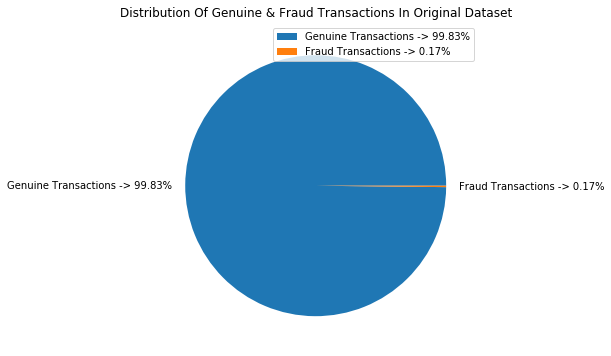

In [9]:
plt.figure(figsize = (6,6))
counts = [dataset['Class'].value_counts().iloc[0],dataset['Class'].value_counts().iloc[1]]
labels = ['Genuine Transactions -> ' + str(round((counts[0]/dataset.shape[0]) * 100, 2)) + "%", 'Fraud Transactions -> '  + str(round((counts[1]/dataset.shape[0]) * 100, 2)) + "%"]
plt.pie(counts, labels=labels)
plt.legend(loc = 'upper right')
plt.title('Distribution Of Genuine & Fraud Transactions In Original Dataset')
plt.show()

In [10]:
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Here it can be observed that the dataset is **highly inbalanced**, and thus for accurate ML predictions and training, a balanced dataset has to be created.

In [11]:
# Selecting All Entries For Fraudulent Transactions
fraud_trans = dataset[dataset['Class'] == 1]

# Selecting 492 Entries Of Genuine Transactions
# Selecting These Entries Randomly using sample() method of Pandas DataFrame
gen_trans = dataset[dataset['Class'] == 0].sample(n = 492, random_state=300)

# Combining Both DataFrames To Form Balanced Dataset
dataset = pd.concat([gen_trans, fraud_trans])

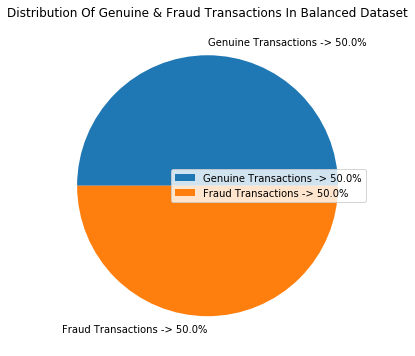

In [12]:
plt.figure(figsize = (6,6))
counts = [dataset['Class'].value_counts().iloc[0],dataset['Class'].value_counts().iloc[1]]
labels = ['Genuine Transactions -> ' + str(round((counts[0]/dataset.shape[0]) * 100, 2)) + "%", 'Fraud Transactions -> '  + str(round((counts[1]/dataset.shape[0]) * 100, 2)) + "%"]
plt.pie(counts, labels=labels)
plt.legend(loc = 'right')
plt.title('Distribution Of Genuine & Fraud Transactions In Balanced Dataset')
plt.show()

In [13]:
dataset['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [14]:
# Saving Balanced Dataset
dataset.to_csv('balanced_dataset.csv')

Now the entries for the Fraudulent and Genuine Transactions are **Perfectly Balanced** in the dataset

<a id='data_split'></a>

### Splitting Dataset Into Train And Test

In [15]:
# Extracting X from the dataset
X = dataset.iloc[:,:-1]

# Extracting y from the dataset
y = dataset.iloc[:,-1]

In [16]:
# Splitting Dataset Into Train and Test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 300)

In [17]:
# Checking Sizes Of Train & Test Splits
print('Size of X_train : ' + str(X_train.shape))
print('Size of y_train : ' + str(y_train.shape))
print('Size of X_test : ' + str(X_test.shape))
print('Size of y_test : ' + str(y_test.shape))

Size of X_train : (787, 30)
Size of y_train : (787,)
Size of X_test : (197, 30)
Size of y_test : (197,)


<a id='feature_scale'></a>

### Feature Scaling

In [18]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<a id='model_build'></a>

## Model Building

<a id='knn'></a>

### KNN Model

In [19]:
# Building Model With Neighbors From 1 to 15
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_scores = []
n_val = []
for i in range(1,16):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    acc_score = cross_val_score(clf, X_train, y_train, scoring='f1', cv=5)
    knn_scores.append(np.mean(acc_score))
    n_val.append(i)

In [20]:
print(n_val)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


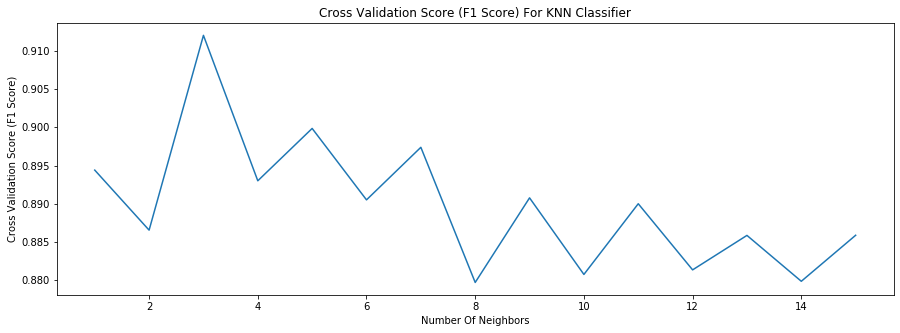

In [21]:
plt.figure(figsize=(15,5))
sns.lineplot(n_val,knn_scores)
plt.title('Cross Validation Score (F1 Score) For KNN Classifier')
plt.xlabel('Number Of Neighbors')
plt.ylabel('Cross Validation Score (F1 Score)')
plt.show()

In [22]:
print('Best F1 Score : ' + str(np.max(knn_scores)))
print('Best Neighbor Value : ' + str(n_val[knn_scores.index(np.max(knn_scores))]))

Best F1 Score : 0.9120103113530229
Best Neighbor Value : 3


In [23]:
# Building Final KNN Model
knn_classifier = KNeighborsClassifier(n_neighbors=n_val[knn_scores.index(np.max(knn_scores))])
knn_classifier.fit(X_train, y_train)
knn_f1_score = np.mean(cross_val_score(knn_classifier, X_train, y_train, scoring='f1', cv=5))

In [24]:
# Saving KNN Model Using Pickle
import pickle
filename = 'KNN_Classifier.model'
with open(filename, 'wb') as file:
    pickle.dump(knn_classifier, file)

<a id='decision_tree'></a>

### Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=300, max_depth=8, min_samples_split=2)
dt_classifier.fit(X_train, y_train)
dt_f1_score = np.mean(cross_val_score(dt_classifier, X_train, y_train, scoring='f1', cv=5))

In [26]:
print('Decison Tree Classifier F1-Score : ' + str(dt_f1_score))

Decison Tree Classifier F1-Score : 0.9123143093465675


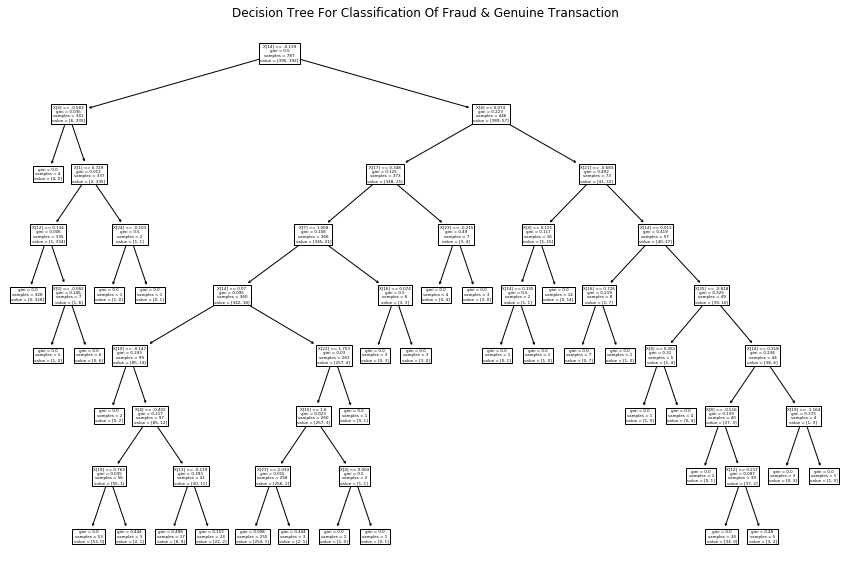

In [27]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(dt_classifier)
plt.title('Decision Tree For Classification Of Fraud & Genuine Transaction')
plt.show()

In [28]:
# Saving Decision Tree Model Using Pickle
import pickle
filename = 'Decison_Tree_Classifier.model'
with open(filename, 'wb') as file:
    pickle.dump(dt_classifier, file)

<a id='random_forest'></a>

### Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=300, n_estimators=100, bootstrap=True)
rf_classifier.fit(X_train, y_train)
rf_f1_score = np.mean(cross_val_score(rf_classifier, X_train, y_train, scoring='f1', cv=5))

In [30]:
print('Random Forest Classifier F1-Score : ' + str(rf_f1_score))

Random Forest Classifier F1-Score : 0.9375590001060772


In [31]:
# Saving Random Forest Model Using Pickle
import pickle
filename = 'Random_Forest_Classifier.model'
with open(filename, 'wb') as file:
    pickle.dump(rf_classifier, file)

<a id='svm'></a>

### SVM Classifier

In [32]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state = 300, probability=True)
svm_classifier.fit(X_train, y_train)
svm_f1_score = np.mean(cross_val_score(svm_classifier, X_train, y_train, scoring='f1', cv=5))

In [33]:
print('Support Vector Classifier F1-Score : ' + str(svm_f1_score))

Support Vector Classifier F1-Score : 0.9376280608622304


In [34]:
# Saving SVM Model Using Pickle
import pickle
filename = 'SVM_Classifier.model'
with open(filename, 'wb') as file:
    pickle.dump(svm_classifier, file)

<a id='naive_bayes'></a>

### Naive Bayes Classifier

In [35]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_f1_score = np.mean(cross_val_score(nb_classifier, X_train, y_train, scoring='f1', cv=5))

In [36]:
print('Naive Bayes Classifier F1-Score : ' + str(nb_f1_score))

Naive Bayes Classifier F1-Score : 0.9088251018489043


In [37]:
# Saving Naive Bayes Model Using Pickle
import pickle
filename = 'NB_Classifier.model'
with open(filename, 'wb') as file:
    pickle.dump(nb_classifier, file)

<a id='lr'></a>

### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
lg_classifier = LogisticRegression(solver='liblinear')
lg_classifier.fit(X_train, y_train)
lg_f1_score = np.mean(cross_val_score(lg_classifier, X_train, y_train, scoring='f1', cv=5))

In [39]:
print('Logistic Regression F1-Score : ' + str(lg_f1_score))

Logistic Regression F1-Score : 0.9375464895635673


In [40]:
# Saving Logistic Regression Model Using Pickle
import pickle
filename = 'LGR_Classifier.model'
with open(filename, 'wb') as file:
    pickle.dump(lg_classifier, file)

<a id='model_eval'></a>

## Model Evaluation

In [41]:
model_eval_df = pd.DataFrame(columns=['Model','Train F1 Score','Test F1 Score','Test Accuracy'])
df_index = 0

<a id='knn_eval'></a>

### KNN Model Evaluation

In [42]:
predictions = knn_classifier.predict(X_test)
# Caculating F1 Score
from sklearn.metrics import f1_score, accuracy_score
knn_test_f1_score = f1_score(y_test, predictions)
knn_test_acc_score = accuracy_score(y_test, predictions)

# Adding Scores To DataFrame
model_eval_df.loc[df_index] = ['KNN', knn_f1_score, knn_test_f1_score, knn_test_acc_score]
df_index = df_index + 1

<a id='decision_tree_eval'></a>

### Decision Tree Evaluation

In [43]:
predictions = dt_classifier.predict(X_test)
# Caculating F1 Score
from sklearn.metrics import f1_score, accuracy_score
dt_test_f1_score = f1_score(y_test, predictions)
dt_test_acc_score = accuracy_score(y_test, predictions)

# Adding Scores To DataFrame
model_eval_df.loc[df_index] = ['Decision Tree', dt_f1_score, dt_test_f1_score, dt_test_acc_score]
df_index = df_index + 1

<a id='random_forest_eval'></a>

### Random Forest Evaluation

In [44]:
predictions = rf_classifier.predict(X_test)
# Caculating F1 Score
from sklearn.metrics import f1_score, accuracy_score
rf_test_f1_score = f1_score(y_test, predictions)
rf_test_acc_score = accuracy_score(y_test, predictions)

# Adding Scores To DataFrame
model_eval_df.loc[df_index] = ['Random Forest', rf_f1_score, rf_test_f1_score, rf_test_acc_score]
df_index = df_index + 1

<a id='svm_eval'></a>

### SVM Model Evaluation

In [45]:
predictions = svm_classifier.predict(X_test)
# Caculating F1 Score
from sklearn.metrics import f1_score, accuracy_score
svm_test_f1_score = f1_score(y_test, predictions)
svm_test_acc_score = accuracy_score(y_test, predictions)

# Adding Scores To DataFrame
model_eval_df.loc[df_index] = ['SVM Classifier', svm_f1_score, svm_test_f1_score, svm_test_acc_score]
df_index = df_index + 1

<a id='naive_bayes_eval'></a>

### Naive Bayes Model Evaluation

In [46]:
predictions = nb_classifier.predict(X_test)
# Caculating F1 Score
from sklearn.metrics import f1_score, accuracy_score
nb_test_f1_score = f1_score(y_test, predictions)
nb_test_acc_score = accuracy_score(y_test, predictions)

# Adding Scores To DataFrame
model_eval_df.loc[df_index] = ['Naive Bayes Classifier', nb_f1_score, nb_test_f1_score, nb_test_acc_score]
df_index = df_index + 1

<a id='lr_eval'></a>

### Logistic Regression Evaluation

In [47]:
predictions = lg_classifier.predict(X_test)
# Caculating F1 Score
from sklearn.metrics import f1_score, accuracy_score
lg_test_f1_score = f1_score(y_test, predictions)
lg_test_acc_score = accuracy_score(y_test, predictions)

# Adding Scores To DataFrame
model_eval_df.loc[df_index] = ['Logistic Regression', lg_f1_score, lg_test_f1_score, lg_test_acc_score]
df_index = df_index + 1

<a id='model_compare'></a>

## Model Performance Comparison

In [48]:
model_eval_df

,Model,Train F1 Score,Test F1 Score,Test Accuracy
0,KNN,0.912010,0.954774,0.954315
1,Decision Tree,0.912314,0.936585,0.934010
2,Random Forest,0.937559,0.969072,0.969543
3,SVM Classifier,0.937628,0.969388,0.969543
4,Naive Bayes Classifier,0.908825,0.953846,0.954315
5,Logistic Regression,0.937546,0.969388,0.969543


The two **Best Performing Models** are:
1. Random Forest Classifier
2. SVM Classifier

However, in the testing set, **SVM Classifier** has a little higher Test Set F1 Score than Random Forest Classifier. Hence, the **BEST MODEL is SVM Classifier**

<a id='best_model'></a>

## Best Model Predictions

In [49]:
# Predicting Using SVM Classifier
predictions = svm_classifier.predict(X_test)

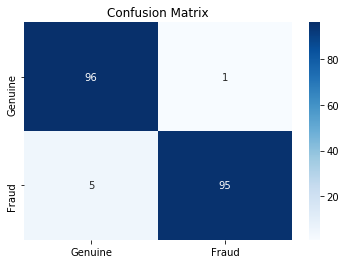

In [50]:
# Visualising Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(cm, index=['Genuine','Fraud'], columns=['Genuine','Fraud'])
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [51]:
# Printing Classification Report
from sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        97
           1       0.99      0.95      0.97       100

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.97      0.97      0.97       197



## ------ END -------